In [6]:
import numpy as np
import matplotlib.pyplot as plt

CHECK EITHER:
- https://www.sfu.ca/~ssurjano/optimization.html
- https://en.wikipedia.org/wiki/Test_functions_for_optimization
- http://infinity77.net/global_optimization/test_functions.html#test-functions-index
- https://arxiv.org/pdf/1308.4008v1.pdf
- http://www-optima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO.htm

In [11]:
def Rastrigin(X, Y):
    """constraints = 5.12, minimum: f(0,0) = 0"""
    A = 10
    return 2 * A + X**2 - np.cos(2 * np.pi * X) + Y**2 - np.cos(2 * np.pi * Y)

def Ackley(X,Y):
    """constraints = 5, minimum: f(0,0) = 0"""
    first  = -20 * np.exp(-0.2 * np.sqrt(0.5 * (X**2 + Y**2)))
    second = -np.exp(0.5 * (np.cos(X) + np.cos(Y))) + np.exp(1) + 20
    return first + second

def Sphere(X,Y):
    """constraints = 5, minimum: f(0,0) = 0"""
    return X**2 + Y**2

def Rosenbrock(X,Y):
    """constraints = 2.5, minimum: f(1,1) = 0"""
    return (1 - X)**2 + 100 * (Y - X**2)**2

def Beale(X,Y):
    """constraints = 4.5, minimum: f(3,0.5) = 0"""
    return (1.5 - X + X * Y)**2 + (2.25 - X + X * Y**2)**2 + (2.625 - X + X * Y**3)**2

def GoldsteinPrice(X,Y):
    """constraints = 2, minimum: f(0,-1) = 3"""
    first = 1 + (X + Y + 1)**2 * (19 - 14 * X + 3 * X**2 - 14 * Y + 6 * X * Y + 3 * Y**2)
    second = 30 + (2 * X - 3 * Y)**2 * (18 - 32 * X + 12 * X**2 + 48 * Y - 36 * X * Y + 27 * Y**2)
    return first * second

def Booth(X,Y):
    """constraints = 10, minimum: f(1,3) = 0"""
    return (X + 2 * Y - 7)**2 + (2 * X + Y - 5)**2

def ThreeHumpCamel(X,Y):
    """constraints = 5, minimum: f(0,0) = 0"""
    return 2 * X**2 - 1.05 * X**4 + X**6/6 + X * Y + Y**2

def Easom(X,Y):
    """constraints = 100, minimum: f(pi,pi) = -1"""
    return -np.cos(X)*np.cos(Y)*np.exp(-((X-np.pi)**2+(Y-np.pi)**2))

def Schaffer(X, Y):
    """constraints=100, minimum f(0,0)=0"""
    numer = np.square(np.sin(X**2 - Y**2)) - 0.5
    denom = np.square(1.0 + (0.001*(X**2 + Y**2)))

    return 0.5 + (numer*(1.0/denom))

def Eggholder(X, Y):
    """constraints=512, minimum f(512, 414.2319)=-959.6407"""
    y = Y+47.0
    a = (-1.0)*(y)*np.sin(np.sqrt(np.absolute((X/2.0) + y)))
    b = (-1.0)*X*np.sin(np.sqrt(np.absolute(X-y)))
    return a+b


def Matyas(X, Y):
    """constraints=10, minimum f(0, 0)=0"""
    return (0.26*(X**2+Y**2))-(0.48*X*Y)

def CrossInTray(X, Y):
    """constraints=10,
    minimum f(1.34941, -1.34941)  = -2.06261
    minimum f(1.34941, 1.34941)   = -2.06261
    minimum f(-1.34941, 1.34941)  = -2.06261
    minimum f(-1.34941, -1.34941) = -2.06261
    """
    B = np.exp(np.absolute(100.0-(np.sqrt(X**2+Y**2)/np.pi)))
    A = np.absolute(np.sin(X)*np.sin(Y)*B)+1
    return -0.0001*(A**0.1)

def Levi(X, Y):
    """constraints=10,
    minimum f(1,1)=0.0
    """
    A = np.sin(3.0*np.pi*X)**2
    B = ((X-1)**2)*(1+np.sin(3.0*np.pi*Y)**2)
    C = ((Y-1)**2)*(1+np.sin(2.0*np.pi*Y)**2)
    return A + B + C

def Himmelblau(X,Y):
    """ Function for evaluating the Himmelblau function.
        
        minimum: f(3.0,2.0)             = 0.0
        minimum: f(-2.805118,3.131312)  = 0.0
        minimum: f(-3.779310,-3.283186) = 0.0
        minimum: f(3.584428,-1.848126)  = 0.0
    Parameters:
    -----------
        x: np.ndarray or list
    
    Returns:
    --------
        result: float

     """
    result = np.power((np.power(X,2)+Y-11),2)+np.power((X+np.power(Y,2)-7),2)
    return result

def HoelderTable(X,Y):
    """
    constraints=10,

    minimum: f(8.05502,9.66459 = -19.2085)
    minimum: f(-8.05502,9.66459 = -19.2085)
    minimum: f(8.05502,-9.66459 = -19.2085)
    minimum: f-(8.05502,-9.66459 = -19.2085)
    """
    return-np.abs(np.sin(X)*np.cos(Y)*np.exp(np.abs(1-(np.sqrt(X**2+Y**2))/(np.pi))))

def McCormick(X,Y):
    """constraints=4, minimum f(-0.54719,-1.54719)=-1.9133"""
    return np.sin(X + Y) + (X - Y)**2 - 1.5*X + 2.5*Y +1

def StyblinskeTang(X,Y):
    """constraints=5, minimum f(-2.903534, -2.903534)=-78.33198"""
    return 0.5 * (X**4 - 16*X**2 + 5*X + Y**4 - 16*Y**2 + 5*Y)



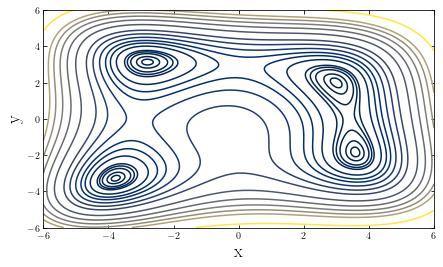

In [18]:
## Defining plot ##
fig, ax = plt.subplots(1,1,figsize = (7,4))

plt.rc('text', usetex=True)
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

CONSTRAINT = 6

xlims = [-CONSTRAINT,CONSTRAINT]
ylims = xlims
ax.set_xlim(xlims[0],xlims[1]), ax.set_ylim(ylims[0],ylims[1])
ax.set_xlabel("x",size=18), ax.set_ylabel("y",size=18)

## Determining levels in function: i.e. Z = 0, 1, 4, 10.... ##
himmelblau_levels = [0,1,4,10,15,20,40,60,80,110,150,200,300,400,500,600,700,1000]

## Setting values for  contourplot ##
xlist = np.linspace(xlims[0],xlims[1],1000)
ylist = np.linspace(ylims[0],ylims[1],1000)
X, Y  = np.meshgrid(xlist,ylist)
f = Himmelblau
Z = f(X,Y)

## Plotting ##
contour_plot = ax.contour(X,Y,Z, himmelblau_levels, antialiased=True,cmap = 'cividis')
plt.show()